In [180]:
#@title **Importar Bibliotecas** { vertical-output: true, form-width: "60%" }

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [189]:
# Lendo a amostra
df = pd.read_csv('Mortalidade_2021_Amostra.csv', sep=';')

# Definindo os tipos de variável
df['SEXO'] = df['SEXO'].astype('category')
df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d%m%Y', errors='coerce')
df['HORAOBITO'] = df['HORAOBITO'].round().astype('Int64')
df['TPMORTEOCO'] = df['TPMORTEOCO'].astype('category')
df['SEMAGESTAC'] = df['SEMAGESTAC'].astype('Int64')
df['PESO'] = df['PESO'].astype('Int64')

df['HORAOBITO'] = df['HORAOBITO'].astype('str') # Transformando em string
df['HORAOBITO'] = df['HORAOBITO'].str.zfill(4) # Colocando um padding para garantir que todos os valores tenham 4 algarismos
df['HORAOBITO'] = pd.to_datetime(df['HORAOBITO'], format='%H%M', errors='coerce').dt.time # Transformando para tipo data HH:MM

df['IDADEMAE'] = df['IDADEMAE'].astype('Int64')


# Apagando colunas inúteis
df = df.drop('ORIGEM', axis=1)
df = df.drop('VERSAOSIST', axis=1)
display(df)

df.info()



/tmp/ipython-input-189-687990089.py:2: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Mortalidade_2021_Amostra.csv', sep=';')


,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,2,2021-11-25,11:46:00,841.0,410490.0,13041936.0,485,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1682168
1,2,2021-01-26,08:00:00,835.0,355030.0,24081946.0,474,2,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74606
2,2,2021-07-07,17:30:00,831.0,313940.0,10121937.0,483,2,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1808592
3,2,2021-08-20,12:35:00,833.0,330455.0,8101924.0,496,2,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1607937
4,2,2021-05-28,19:25:00,823.0,231400.0,20051976.0,445,2,1.0,2.0,...,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,799846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,2021-10-25,23:50:00,835.0,351010.0,19101954.0,467,2,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1671241
49996,2,2021-12-04,13:45:00,835.0,355220.0,6121957.0,463,1,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1458481
49997,2,2021-05-27,23:30:00,843.0,431710.0,15101981.0,439,1,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,960278
49998,2,2021-06-04,19:30:00,826.0,260620.0,27012005.0,416,1,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,789072


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 85 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TIPOBITO    50000 non-null  int64         
 1   DTOBITO     49767 non-null  datetime64[ns]
 2   HORAOBITO   48540 non-null  object        
 3   NATURAL     47485 non-null  float64       
 4   CODMUNNATU  46813 non-null  float64       
 5   DTNASC      49921 non-null  float64       
 6   IDADE       50000 non-null  int64         
 7   SEXO        50000 non-null  category      
 8   RACACOR     48832 non-null  float64       
 9   ESTCIV      47651 non-null  float64       
 10  ESC         46668 non-null  float64       
 11  ESC2010     46497 non-null  float64       
 12  SERIESCFAL  12579 non-null  float64       
 13  OCUP        42570 non-null  float64       
 14  CODMUNRES   50000 non-null  int64         
 15  LOCOCOR     50000 non-null  int64         
 16  CODESTAB    38059 non-

# Perguntas a se responder
- De forma geral, qual sexo teve mais óbitos?
- Quais municipios ou estados possuem maior taxa de mortalidade
- Há correlação entre Estado civil e Suicidio?
- A ocupação das mães do falecidos pode ter alguma relação com a taxa mortalidade?
- A morte ocorre com mais frequência em que momento? Antes, durante ou depois do parto (ver TPMORTEOCO).
- Quem mais atesta óbitos? (ver ATESTANTE)
- Para as mortes decorridas de acidentes de trabalho:
  - Quais ocupações geram mais mortes?
  - Costuma-se realizar autópsias para confirmação dos casos de mortes por acidente de trabalho?
  - Os acidentes de trabalho costuma ser comunicados por quem? Familia, polícia?
  - As mortes por acidentes ocorreram aonde? (ver TPOBITOCOR)
- O local de óbito e o tipo de óbito tem alguma relação?
  - Mortes em aldeias indígenas costuma ter qual motivação, por exemplo? Natural, não natural etc.
  - Mortes em domicílio costuma ser mortes naturais?

# Respondidas
- O que se pode concluir com o número de semanas de gravidez?
- Em quais faixas de peso ocorreram mais óbitos?
- Como é a distribuição dos horários de óbito?

### O que se pode concluir com o número de semanas de gravidez?
Pelas análises, pode-se concluir que a maioria dos óbitos ocorrem na segunda metade da gravidez, ou seja, 20 semanas ou mais. Isso faz sentido, considerando que na gravidez as complicações maiores geralmente surgem quando o embrião já se desenvolveu o suficiente ou já no final da gravidez, na hora do parto.
Olhando para os gráficos, percebemos uma crescente por volta das 35-40 semanas e a média de aproximadamente 31, que seria exatamente o final da gravidez (8 a 9 meses aproximadamente).

Outro fator interessante é o pico de óbitos no início da gravidez. Esse pico provavelmente indica a rejeição da gravidez por outros tipos de problemas, como alterações cromossômicas do embrião ou rejeição imunológica, quando o corpo da mãe reconhece o embrião como um corpo estranho. Assim o aborto acontece já nas primeiras semanas de gestação, levando muitas mães a óbito.

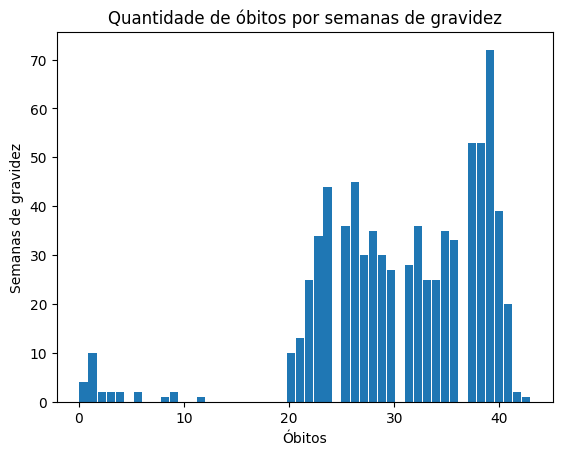

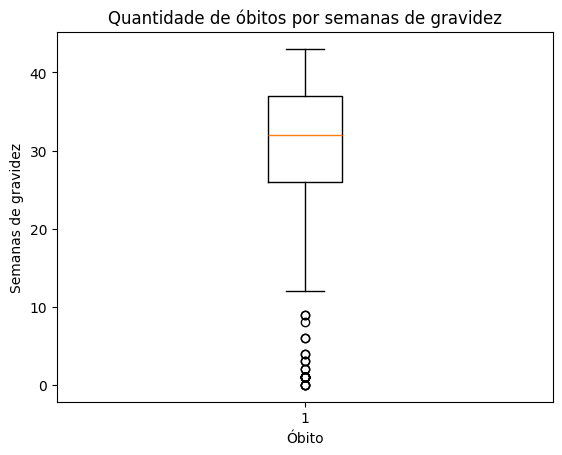

,SEMAGESTAC
count,777.0
mean,30.72973
std,7.965554
min,0.0
25%,26.0
50%,32.0
75%,37.0
max,43.0


In [188]:
# Separando os registros menores que 50, já que o tempo médio de gravidez é de 40 semanas. Gravidez com períodos maiores do que isso são extremamente raras.
df[(df['SEMAGESTAC'] < 50)]['SEMAGESTAC'].plot.hist(bins=50, rwidth=0.9)
plt.ylabel("Semanas de gravidez")
plt.xlabel("Óbitos")
plt.title("Quantidade de óbitos por semanas de gravidez")
plt.show()

plt.boxplot(df[(df['SEMAGESTAC'] < 50)]['SEMAGESTAC'])
plt.ylabel("Semanas de gravidez")
plt.xlabel("Óbito")
plt.title("Quantidade de óbitos por semanas de gravidez")
plt.show()

df[(df['SEMAGESTAC'] < 50)]['SEMAGESTAC'].describe() # Informações de média, desvio padrão, máximo, mínimo e mais

### Em quais faixas de peso ocorreram mais óbitos?
Olhando os gráficos, percebe-se um pico no intervalo de 300 a 1000 gramas ao nascer. Isso demonstra que os partos precoces aumentam significativamente as chances de óbito.

Em pesquisas feitas no site [Babysec](https://www.babysec.com.br/nota/peso-nos-recem-nascidos), viu-se que a média de peso ao nascer é de 3.400 gramas. Isto explica que a existência de um pico menos protuberante na faixa de 3000 gramas se deu pelo fator "normalidade".

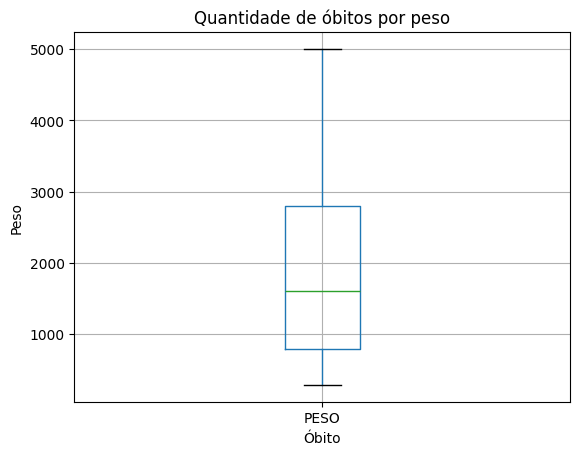

In [183]:
df['PESO']
df.boxplot(column=['PESO'])
plt.ylabel("Peso")
plt.xlabel("Óbito")
plt.title("Quantidade de óbitos por peso")
plt.show()

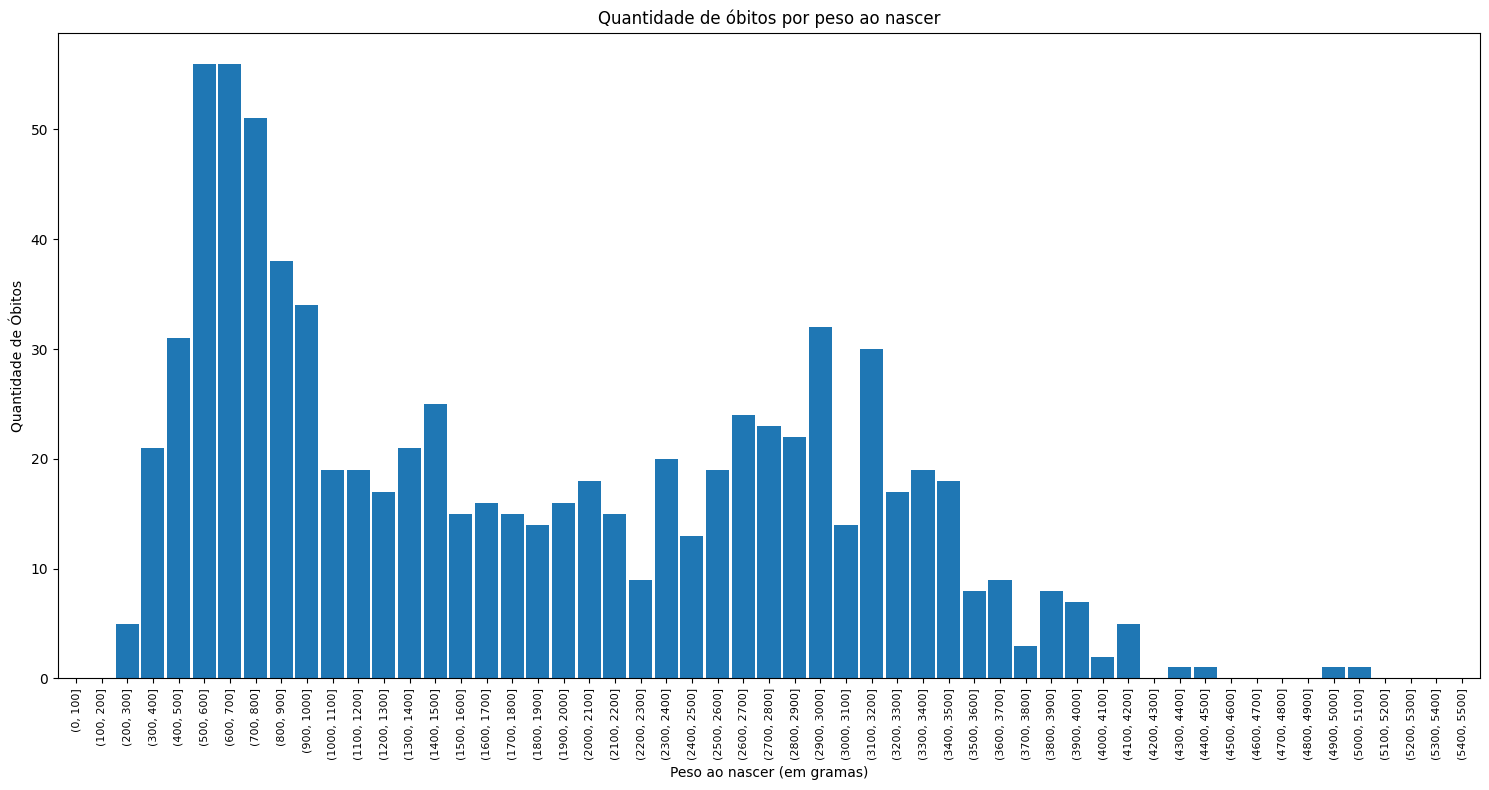

In [187]:
# Criando faixas de peso de 100 em 100
faixas_peso = np.arange(0, 5501, 100)

# Categorizando os registros nas faixas
bins = pd.cut(df['PESO'], faixas_peso)

# Agrupar pelas faixas e contar as ocorrências
contagem_por_peso = df.groupby(bins).size()

# Plotar o resultado da contagem
plt.figure(figsize=(15, 8))
contagem_por_peso.plot(kind='bar', width=0.9)

plt.xlabel("Peso ao nascer (em gramas)")
plt.ylabel("Quantidade de Óbitos")
plt.title("Quantidade de óbitos por peso ao nascer")

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### Como é a distribuição dos horários de óbito?

/tmp/ipython-input-186-1024467381.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['HORAOBITO'].astype(str)).dt.hour # Extraindo as horas


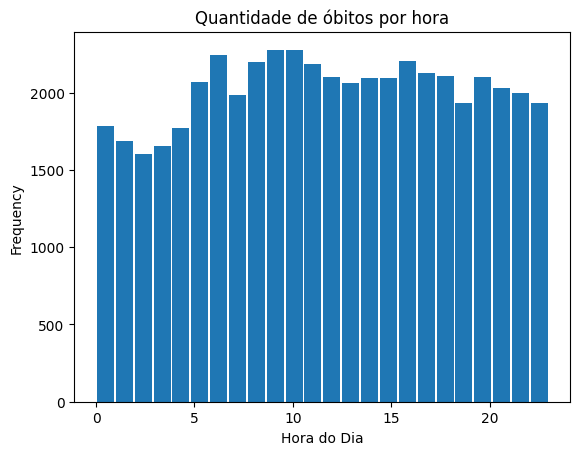

In [186]:
df['hora'] = pd.to_datetime(df['HORAOBITO'].astype(str)).dt.hour # Extraindo as horas

df['hora'].plot.hist(bins=24, rwidth=0.9)
plt.xlabel("Hora do Dia")
plt.title("Quantidade de óbitos por hora")
plt.show()